# Satisfactory power calculation

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import calculator

## Setting up resources

In [3]:
def resources_map_limits():
    return {
        calculator.item_name_power_net_average: math.inf,
        calculator.item_name_power_gross_average: math.inf,

        # There are 106 Somersloops on the map, but 1 Somersloops
        # must be used to unlock the Production Amplifier in order to utilize this.
        # Note, must be 104 if Alien Power Augmenter is also unlocked,
        # and -10 for every Alien Power Augmenter used.
        # calculator.item_name_production_shard: 105.0,
    
        "Desc_Water_C": [
            calculator.Resource(math.inf, ("Recipe_Water_WaterPump_C",)),
        ],
    
        "Desc_OreBauxite_C": [
            calculator.Resource(5.0, ("Recipe_OreBauxite_Impure_MinerMk1_C", "Recipe_OreBauxite_Impure_MinerMk2_C", "Recipe_OreBauxite_Impure_MinerMk3_C")),
            calculator.Resource(6.0, ("Recipe_OreBauxite_Normal_MinerMk1_C", "Recipe_OreBauxite_Normal_MinerMk2_C", "Recipe_OreBauxite_Normal_MinerMk3_C")),
            calculator.Resource(6.0, ("Recipe_OreBauxite_Pure_MinerMk1_C", "Recipe_OreBauxite_Pure_MinerMk2_C", "Recipe_OreBauxite_Pure_MinerMk3_C")),
        ],
        "Desc_OreGold_C": [
            calculator.Resource(0.0, ("Recipe_OreGold_Impure_MinerMk1_C", "Recipe_OreGold_Impure_MinerMk2_C", "Recipe_OreGold_Impure_MinerMk3_C")),
            calculator.Resource(9.0, ("Recipe_OreGold_Normal_MinerMk1_C", "Recipe_OreGold_Normal_MinerMk2_C", "Recipe_OreGold_Normal_MinerMk3_C")),
            calculator.Resource(8.0, ("Recipe_OreGold_Pure_MinerMk1_C", "Recipe_OreGold_Pure_MinerMk2_C", "Recipe_OreGold_Pure_MinerMk3_C")),
        ],
        "Desc_Coal_C": [
            calculator.Resource(15.0, ("Recipe_Coal_Impure_MinerMk1_C", "Recipe_Coal_Impure_MinerMk2_C", "Recipe_Coal_Impure_MinerMk3_C")),
            calculator.Resource(31.0, ("Recipe_Coal_Normal_MinerMk1_C", "Recipe_Coal_Normal_MinerMk2_C", "Recipe_Coal_Normal_MinerMk3_C")),
            calculator.Resource(16.0, ("Recipe_Coal_Pure_MinerMk1_C", "Recipe_Coal_Pure_MinerMk2_C", "Recipe_Coal_Pure_MinerMk3_C")),
        ],
        "Desc_OreCopper_C": [
            calculator.Resource(13.0, ("Recipe_OreCopper_Impure_MinerMk1_C", "Recipe_OreCopper_Impure_MinerMk2_C", "Recipe_OreCopper_Impure_MinerMk3_C")),
            calculator.Resource(29.0, ("Recipe_OreCopper_Normal_MinerMk1_C", "Recipe_OreCopper_Normal_MinerMk2_C", "Recipe_OreCopper_Normal_MinerMk3_C")),
            calculator.Resource(13.0, ("Recipe_OreCopper_Pure_MinerMk1_C", "Recipe_OreCopper_Pure_MinerMk2_C", "Recipe_OreCopper_Pure_MinerMk3_C")),
        ],
        "Desc_OreIron_C": [
            calculator.Resource(39.0, ("Recipe_OreIron_Impure_MinerMk1_C", "Recipe_OreIron_Impure_MinerMk2_C", "Recipe_OreIron_Impure_MinerMk3_C")),
            calculator.Resource(42.0, ("Recipe_OreIron_Normal_MinerMk1_C", "Recipe_OreIron_Normal_MinerMk2_C", "Recipe_OreIron_Normal_MinerMk3_C")),
            calculator.Resource(46.0, ("Recipe_OreIron_Pure_MinerMk1_C", "Recipe_OreIron_Pure_MinerMk2_C", "Recipe_OreIron_Pure_MinerMk3_C")),
        ],
        "Desc_Stone_C": [
            calculator.Resource(15.0, ("Recipe_Stone_Impure_MinerMk1_C", "Recipe_Stone_Impure_MinerMk2_C", "Recipe_Stone_Impure_MinerMk3_C")),
            calculator.Resource(50.0, ("Recipe_Stone_Normal_MinerMk1_C", "Recipe_Stone_Normal_MinerMk2_C", "Recipe_Stone_Normal_MinerMk3_C")),
            calculator.Resource(39.0, ("Recipe_Stone_Pure_MinerMk1_C", "Recipe_Stone_Pure_MinerMk2_C", "Recipe_Stone_Pure_MinerMk3_C")),
        ],
        "Desc_RawQuartz_C": [
            calculator.Resource(3.0, ("Recipe_RawQuartz_Impure_MinerMk1_C", "Recipe_RawQuartz_Impure_MinerMk2_C", "Recipe_RawQuartz_Impure_MinerMk3_C")),
            calculator.Resource(7.0, ("Recipe_RawQuartz_Normal_MinerMk1_C", "Recipe_RawQuartz_Normal_MinerMk2_C", "Recipe_RawQuartz_Normal_MinerMk3_C")),
            calculator.Resource(7.0, ("Recipe_RawQuartz_Pure_MinerMk1_C", "Recipe_RawQuartz_Pure_MinerMk2_C", "Recipe_RawQuartz_Pure_MinerMk3_C")),
        ],
        "Desc_SAM_C": [
            calculator.Resource(10.0, ("Recipe_SAM_Impure_MinerMk1_C", "Recipe_SAM_Impure_MinerMk2_C", "Recipe_SAM_Impure_MinerMk3_C")),
            calculator.Resource(6.0, ("Recipe_SAM_Normal_MinerMk1_C", "Recipe_SAM_Normal_MinerMk2_C", "Recipe_SAM_Normal_MinerMk3_C")),
            calculator.Resource(3.0, ("Recipe_SAM_Pure_MinerMk1_C", "Recipe_SAM_Pure_MinerMk2_C", "Recipe_SAM_Pure_MinerMk3_C")),
        ],
        "Desc_Sulfur_C": [
            calculator.Resource(6.0, ("Recipe_Sulfur_Impure_MinerMk1_C", "Recipe_Sulfur_Impure_MinerMk2_C", "Recipe_Sulfur_Impure_MinerMk3_C")),
            calculator.Resource(5.0, ("Recipe_Sulfur_Normal_MinerMk1_C", "Recipe_Sulfur_Normal_MinerMk2_C", "Recipe_Sulfur_Normal_MinerMk3_C")),
            calculator.Resource(5.0, ("Recipe_Sulfur_Pure_MinerMk1_C", "Recipe_Sulfur_Pure_MinerMk2_C", "Recipe_Sulfur_Pure_MinerMk3_C")),
        ],
        "Desc_OreUranium_C": [
            calculator.Resource(3.0, ("Recipe_OreUranium_Impure_MinerMk1_C", "Recipe_OreUranium_Impure_MinerMk2_C", "Recipe_OreUranium_Impure_MinerMk3_C")),
            calculator.Resource(2.0, ("Recipe_OreUranium_Normal_MinerMk1_C", "Recipe_OreUranium_Normal_MinerMk2_C", "Recipe_OreUranium_Normal_MinerMk3_C")),
            calculator.Resource(0.0, ("Recipe_OreUranium_Pure_MinerMk1_C", "Recipe_OreUranium_Pure_MinerMk2_C", "Recipe_OreUranium_Pure_MinerMk3_C")),
        ],
    
        "Desc_LiquidOil_C": [
            calculator.Resource(10.0, ("Recipe_LiquidOil_Impure_OilPump_C",)),
            calculator.Resource(12.0, ("Recipe_LiquidOil_Normal_OilPump_C",)),
            calculator.Resource(8.0, ("Recipe_LiquidOil_Pure_OilPump_C",)),
    
            calculator.Resource(8.0, ("Recipe_LiquidOil_Impure_FrackingExtractor_6_C",)),
            calculator.Resource(6.0, ("Recipe_LiquidOil_Normal_FrackingExtractor_6_C",)),
            calculator.Resource(4.0, ("Recipe_LiquidOil_Pure_FrackingExtractor_6_C",)),
        ],
    
        "Desc_NitrogenGas_C": [
            calculator.Resource(2.0, ("Recipe_NitrogenGas_Impure_FrackingExtractor_8_C",)),
    
            calculator.Resource(2.0, ("Recipe_NitrogenGas_Normal_FrackingExtractor_6_C",)),
            calculator.Resource(3.0, ("Recipe_NitrogenGas_Normal_FrackingExtractor_7_C",)),
            calculator.Resource(2.0, ("Recipe_NitrogenGas_Normal_FrackingExtractor_8_C",)),
    
            calculator.Resource(4.0, ("Recipe_NitrogenGas_Pure_FrackingExtractor_6_C",)),
            calculator.Resource(18.0, ("Recipe_NitrogenGas_Pure_FrackingExtractor_7_C",)),
            calculator.Resource(4.0, ("Recipe_NitrogenGas_Pure_FrackingExtractor_8_C",)),
            calculator.Resource(10.0, ("Recipe_NitrogenGas_Pure_FrackingExtractor_10_C",)),
        ],
    }

In [4]:
def geothermal_map_limits():
    return {
        "Recipe_GeoThermal_C": 0.5 * 9 + 13 + 2 * 9,
    }

## Utility tools

In [5]:
def solve_with_data_for_augmented_net_power(
    default_production_boost: float,
    zero_almost_all_items: bool,
    production_shards: int,
    alien_power_augmenters_unfueled: int,
    alien_power_augmenters_fueled: int,
    additional_recipes_equal: dict
):
    recipes = calculator.parse_recipes(
        filename="Docs/en-US.json",
        default_production_boost=default_production_boost,
        production_amplified_production_boosts=[1.0, 2.0, 2.5],
        extractors_production_boost=2.5,
        default_generators_production_boost=1.0,
    )

    resources = resources_map_limits()

    if production_shards != 0:
        resources |= {calculator.item_name_production_shard: float(production_shards)}

    items_equal={
        "Desc_AlienPowerFuel_C": float(5 * alien_power_augmenters_fueled),
    }

    additional_recipes_equal = additional_recipes_equal | geothermal_map_limits()

    c = calculator.maximize_for_augmented_power_net(
        alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
        alien_power_augmenters_fueled=alien_power_augmenters_fueled,
        recipes=recipes,
        resources=resources
    )
    
    solution = calculator.solve(
        c=c,
        resources=resources,
        items_equal=items_equal,
        recipes=recipes,
        additional_recipes_equal=additional_recipes_equal,
        zero_almost_all_items=zero_almost_all_items,
    )

    return solution

In [6]:
def discretize_production_shards(recipes_solution):
    production_shards = 0
    recipes_floor_production_shards = {}
    for recipe, amount in recipes_solution:
        if recipe.production_shards != 0:
            floor_amount = math.floor(amount)
            production_shards += floor_amount * recipe.production_shards
            recipes_floor_production_shards[recipe.class_name] = float(floor_amount)
            # print(recipe.class_name, floor_amount)
    return production_shards, recipes_floor_production_shards

In [7]:
def filter_relevant_recipes(recipes_solution):
    power_recipes = {
        "Recipe_Build_GeneratorCoal_C_Desc_Coal_C_C",
        "Recipe_Build_GeneratorCoal_C_Desc_CompactedCoal_C_C",
        "Recipe_Build_GeneratorCoal_C_Desc_PetroleumCoke_C_C",
        
        "Recipe_Build_GeneratorFuel_C_Desc_LiquidFuel_C_C",
        "Recipe_Build_GeneratorFuel_C_Desc_LiquidTurboFuel_C_C",
        "Recipe_Build_GeneratorFuel_C_Desc_RocketFuel_C_C",
        "Recipe_Build_GeneratorFuel_C_Desc_IonizedFuel_C_C",
        
        "Recipe_Build_GeneratorNuclear_C_Desc_NuclearFuelRod_C_C",
        "Recipe_Build_GeneratorNuclear_C_Desc_PlutoniumFuelRod_C_C",
        "Recipe_Build_GeneratorNuclear_C_Desc_FicsoniumFuelRod_C_C",
        
        "Recipe_GeoThermal_C",
    }
    relevant_recipes = []
    for recipe, amount in recipes_solution:
        if recipe.production_shards != 0 or recipe.class_name in power_recipes or ("Recipe_ResourceSink_" in recipe.class_name):
            relevant_recipes.append((recipe, amount))
    return relevant_recipes

In [8]:
def solve_with_discretized_production_shards(
    default_production_boost: float,
    zero_almost_all_items: bool,
    production_shards: int,
    alien_power_augmenters_unfueled: int,
    alien_power_augmenters_fueled: int,
):
    # production_shards here mean Somersloops in builds, not in APA.
    # This is a heuristic algorithm, no guarantee it will get the best solution for the given production shards.
    # The issue is that we can only use discrete amount of Somersloops, and not fractions.
    # This algorithm tries to figure out which buildings will get how many Somersloops for power amplification.
    # What it does is this: increases the amount of total Somersloops in buildings, and see
    # what would happen if the recipes wouldn't be the result, but rather, if we changed the recipes
    # so that we only used the floor of each recipe to be whole number.
    # If this whole number is the maximum amount, and still less than the available Somersloops,
    # then we accept that as the solution.
    solution = None
    trying_production_shards = production_shards
    for _ in range(50):
        new_solution = solve_with_data_for_augmented_net_power(
            default_production_boost=default_production_boost,
            zero_almost_all_items=zero_almost_all_items,
            production_shards=trying_production_shards,
            alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
            alien_power_augmenters_fueled=alien_power_augmenters_fueled,
            additional_recipes_equal={},
        )
        if new_solution is None:
            return None
        new_recipes_solution, _, _ = new_solution
        discretized_production_shards, _ = discretize_production_shards(new_recipes_solution)
        # print(f"{trying_production_shards=}, {discretized_production_shards=}, {production_shards=}")
        if (discretized_production_shards > production_shards):
            break
        solution = new_solution
        trying_production_shards += 1

    recipes_solution, _, _ = solution
    solution_production_shards, additional_recipes_equal = discretize_production_shards(recipes_solution)

    solution = solve_with_data_for_augmented_net_power(
        default_production_boost=default_production_boost,
        zero_almost_all_items=zero_almost_all_items,
        production_shards=solution_production_shards,
        alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
        alien_power_augmenters_fueled=alien_power_augmenters_fueled,
        additional_recipes_equal=additional_recipes_equal,
    )

    if solution is None:
        return None
    recipes_solution, items_solution, items_gross_solution = solution
    power_augmented_net = calculator.get_power_augmented_net(
        items=items_solution,
        alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
        alien_power_augmenters_fueled=alien_power_augmenters_fueled,
    )

    return power_augmented_net, recipes_solution, items_solution

In [9]:
def visualize_power_composition(recipes_solution, power_augmented_net, title):    
    power_recipes = {
        "Recipe_Build_GeneratorCoal_C_Desc_Coal_C_C": ("Coal", "#000000"),
        "Recipe_Build_GeneratorCoal_C_Desc_CompactedCoal_C_C": ("Compacted Coal", "#2b3549"),
        "Recipe_Build_GeneratorCoal_C_Desc_PetroleumCoke_C_C": ("Petroleum Coke", "#513f23"),
        
        "Recipe_Build_GeneratorFuel_C_Desc_LiquidFuel_C_C": ("Fuel", "#eb7d15"),
        "Recipe_Build_GeneratorFuel_C_Desc_LiquidTurboFuel_C_C": ("Turbo Fuel", "#d4292e"),
        "Recipe_Build_GeneratorFuel_C_Desc_RocketFuel_C_C": ("Rocket Fuel", "#bd251a"),
        "Recipe_Build_GeneratorFuel_C_Desc_IonizedFuel_C_C": ("Ionized Fuel", "#d55f1a"),
        
        "Recipe_Build_GeneratorNuclear_C_Desc_NuclearFuelRod_C_C": ("Uranium", "#73b501"),
        "Recipe_Build_GeneratorNuclear_C_Desc_PlutoniumFuelRod_C_C": ("Plutonium", "#01b5a0"),
        "Recipe_Build_GeneratorNuclear_C_Desc_FicsoniumFuelRod_C_C": ("Ficsonium", "#e8e002"),
        
        "Recipe_GeoThermal_C": ("Geothermal", "#e4e5bc"),
    }

    sum_total_amount = sum(
        amount * recipe.items[calculator.item_name_power_net_average]
        for recipe, amount in recipes_solution
        if recipe.class_name in power_recipes
    )

    labels = []
    sizes = []
    colors = []
    for recipe, amount in recipes_solution:
        if recipe.class_name in power_recipes:
            total_amount = amount * recipe.items[calculator.item_name_power_net_average]
            name = power_recipes[recipe.class_name][0]
            percentage = 100 * total_amount / sum_total_amount
            
            labels.append(f"{name}\n({percentage:.1f} %, {(total_amount / 1000):.1f} GW, {amount:.3f}x)")
            sizes.append(percentage)
            colors.append(power_recipes[recipe.class_name][1])
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Create pie chart with a "hole" in the middle
    wedges, texts = ax.pie(
        sizes,
        labels=labels,
        startangle=90,
        wedgeprops=dict(width=0.5),
        colors=colors
    )
    
    ax.set_title(f"Energy type by gross power\n({title})\nGross power: {(sum_total_amount / 1000):,.3f} GW\nAugmented net power: {(power_augmented_net / 1000):,.3f} GW")
    plt.show()

In [10]:
def solve_with_discretized_production_shards_and_visualize(
    default_production_boost: float,
    zero_almost_all_items: bool,
    production_shards: int,
    alien_power_augmenters_unfueled: int,
    alien_power_augmenters_fueled: int,
):
    power_augmented_net, recipes_solution, items_solution = solve_with_discretized_production_shards(
        default_production_boost=default_production_boost,
        zero_almost_all_items=zero_almost_all_items,
        production_shards=production_shards,
        alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
        alien_power_augmenters_fueled=alien_power_augmenters_fueled,
    )
    
    title = (
        f"{production_shards} Somersloops in buildings, "
        f"{alien_power_augmenters_unfueled} unfueled APAs, "
        f"{alien_power_augmenters_fueled} fueled APAs, "
        f"{'no' if zero_almost_all_items else 'with'} waste, "
        f"{int(default_production_boost * 100)} % clock rate"
    )

    visualize_power_composition(recipes_solution, power_augmented_net, title)

    print("=== Recipes ===")
    for recipe, recipe_amount in recipes_solution:
        print(f"{recipe.class_name}: {recipe_amount}")

    print()
    print("=== Power generators and Somerslooped recipes ===")
    for recipe, recipe_amount in filter_relevant_recipes(recipes_solution):
        print(f"{recipe.class_name}: {recipe_amount}")
        for item, item_amount in recipe.items.items():
            total_amount = recipe_amount * item_amount
            if abs(total_amount) > 1e-10 and item not in (calculator.item_name_power_net_average, calculator.item_name_power_gross_average):
                print(f"  {item}: {recipe_amount * item_amount} / min")

    print()
    print("=== Net items ===")
    for k, v in items_solution.items():
        print(k, v)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def optimize_somersloops_and_visualize(
    default_production_boost: float,
    zero_almost_all_items: bool,
):
    max_alien_power_augmenters = 10
    
    max_power = 0.0
    power_shards_for_max_power = 0
    alien_power_augmenters_unfueled_max_power = 0
    alien_power_augmenters_fueled_max_power = 0
    
    power = np.full((max_alien_power_augmenters + 1, max_alien_power_augmenters + 1), np.nan)
    for alien_power_augmenters in range(max_alien_power_augmenters + 1):
        for alien_power_augmenters_fueled in range(alien_power_augmenters + 1):
            production_shards = (
                105 if (alien_power_augmenters == 0)
                else (104 - alien_power_augmenters * 10)
            )

            alien_power_augmenters_unfueled = alien_power_augmenters - alien_power_augmenters_fueled
    
            print(f"Calculating {alien_power_augmenters=}, {alien_power_augmenters_unfueled=}, {alien_power_augmenters_fueled=}, {production_shards=}")
            solution = solve_with_discretized_production_shards(
                default_production_boost=default_production_boost,
                zero_almost_all_items=zero_almost_all_items,
                production_shards=production_shards,
                alien_power_augmenters_unfueled=alien_power_augmenters_unfueled,
                alien_power_augmenters_fueled=alien_power_augmenters_fueled,
            )
            if solution is not None:
                power_augmented_net, _, _ = solution
                power[alien_power_augmenters_fueled, alien_power_augmenters] = power_augmented_net
                if power_augmented_net > max_power:
                    max_power = power_augmented_net
                    power_shards_for_max_power = production_shards
                    alien_power_augmenters_unfueled_max_power = alien_power_augmenters_unfueled
                    alien_power_augmenters_fueled_max_power = alien_power_augmenters_fueled
    
    fig, ax = plt.subplots(figsize=(7,6))
    cmap = plt.cm.inferno
    c = ax.imshow(
        power,
        origin="lower",
        cmap=cmap,
        interpolation="none"
    )
    fig.colorbar(c, ax=ax, label=" (MW)")
    ax.set_xticks(np.arange(max_alien_power_augmenters+1))
    ax.set_yticks(np.arange(max_alien_power_augmenters+1))
    ax.set_xlabel("Total Alien Power Augmenters")
    ax.set_ylabel("Fueled Alien Power Augmenters")

    title = f"{'no' if zero_almost_all_items else 'with'} waste, {int(default_production_boost * 100)} % clock rate"
    ax.set_title(f"Augmented net power ({title})")

    solve_with_discretized_production_shards_and_visualize(
        default_production_boost=default_production_boost,
        zero_almost_all_items=zero_almost_all_items,
        production_shards=power_shards_for_max_power,
        alien_power_augmenters_unfueled=alien_power_augmenters_unfueled_max_power,
        alien_power_augmenters_fueled=alien_power_augmenters_fueled_max_power,
    )
    
    plt.show()

## Introduction

The goal is to calculate the maximum average net power without using Biofuels and Batteries.

The ultimate result is the following (see also later this same result): by using 8 fueled Alien Power Augmenters, 14 Somersloops in the buildings, and allowing waste to accumulate (Plutonium Waste in this case), and setting all buildings to 1 % clock rate (except for the production amplified buildings and extractors (except Water Extractor)), we arrive to the following result.

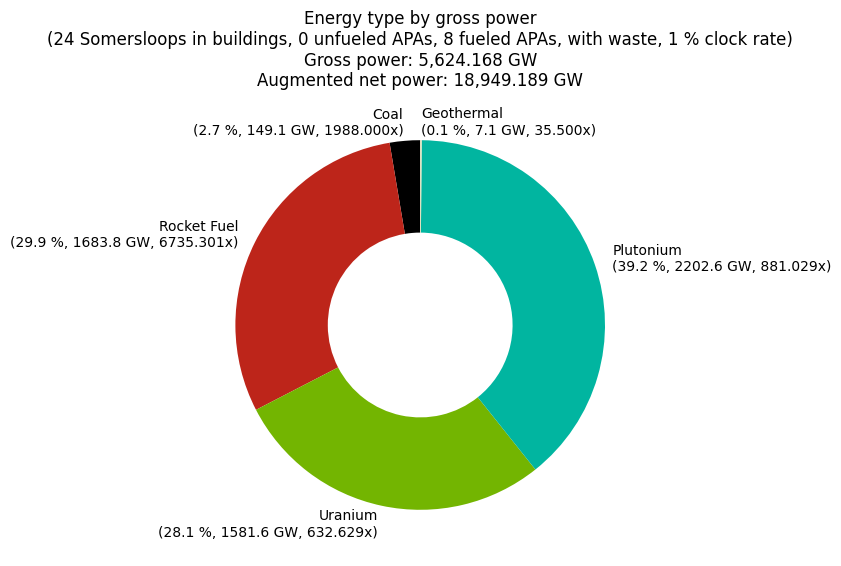

=== Recipes ===
Recipe_IronPlate_C: 12353.686275871163
Recipe_IngotIron_C: 114386.37401511928
Recipe_RocketFuel_C: 28063.756052685283
Recipe_QuantumEnergy_C: 2700.0000000000005
Recipe_SuperpositionOscillator_C: 2400.0
Recipe_SAMFluctuator_C: 1999.9999999999998
Recipe_TimeCrystal_C: 8666.666666666668
Recipe_IngotSAM_C: 2500.0
Recipe_IngotSAM_C_PS1_PB2.5: 24.0
Recipe_Bauxite_Copper_C: 15135.243988289494
Recipe_Nitrogen_Caterium_C: 8030.2804093802615
Recipe_Sulfur_Iron_C: 3432.5706345526264
Recipe_Uranium_Bauxite_C: 4901.904967777615
Recipe_Alternate_Turbofuel_C: 18709.170701790186
Recipe_PetroleumCoke_C: 7865.334698965577
Recipe_ResidualPlastic_C: 3075.616424686474
Recipe_ResidualRubber_C: 16386.57536297029
Recipe_Alternate_Diamond_Cloudy_C: 5200.0
Recipe_Alternate_DarkMatter_Trap_C: 933.3333333333334
Recipe_Alternate_DarkMatter_Crystallization_C: 2000.0000000000002
Recipe_Alternate_WetConcrete_C: 11453.372119135685
Recipe_Alternate_SteamedCopperSheet_C: 23155.1168494919
Recipe_Alternate

In [12]:
solve_with_discretized_production_shards_and_visualize(
    default_production_boost=0.01,
    zero_almost_all_items=False,
    production_shards=24,
    alien_power_augmenters_unfueled=0,
    alien_power_augmenters_fueled=8,
)

### Note on Somersloops

Somersloops could be used in buildings for Production Amplification (see https://satisfactory.wiki.gg/wiki/Production_amplifier), and in Alien Power Augmenters (https://satisfactory.wiki.gg/wiki/Alien_Power_Augmenter). There are at most 106 Somersloops in the game, but if we're using Production Amplification, we need 1 to unlock it, and if we're using Alien Power Augmenters, we need 1 to unlock this too. All-in-all, this is taken into account in the following calculations.

Calculating how many Somersloops are needed in each building to get the maximum amount of power is very difficult, and I've only guessed a heuristic algorithm that gives us a good estimation to which buildings need how many Somersloops.

When using Alien Power Augmenters, we need to maximize the power for the augmented net power, which is not the same as maximizing power for the gross power or the net power generated by buildings other than the Alien Power Augmenters. There is a slight difference between maximizing for the gross power and maximizing for the augmented net power. I'm not detailing this result here, but you're free to play with this in the notebook.

### Note on the different cases

Below there are several cases where the maximum power was calculated, and these cases are in ascending order of the average net power.

We can differentiate the following cases.
-   Using Somersloops or not (both in buildings and Alien Power Augmenters).
-   Allowing to produce waste or not. (If we don't allow waste, we still might use AWESOME Sink, but those items need to be sinked.)
-   All buildings clocked to 100 % or 1 % (except for Production Amplified buildings and extractors (except for Water Extractor)).

Notice, that when we allow waste to be produced, Plutonium also appears, but without waste, it does not. It seems to indicate, that generating Ficsonium fuel out of Plutonium Waste is very power inefficient, because the only way to get rid of Plutonium Waste is to turn it into Ficsonium Fuel.

Notice, that in the following cases when we underclock buildings to 1 %, Ionized Fuel appears, but without that it doesn't. It seems to indicate that Ionized Fuel is very ineffient (taking into account production), but when the power needed to produce it is significantly lowered, using a small proportion of this is still worth it.

Overall, Rocket Fuel and Uranium (and Plutonium if waste is allowed) dominates the power production, and Compacted Coal, Petroleum Coke and Ficsonium does not even appear in the cases mentioned. This is a good indication which fuel types are worth it relative to the other types.

### The algorithm

The algorithm's core is a linear objective function minimalization, SciPy's `linprog` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).
Each recipe's amount (how many we use a specific recipe) is an element in a vector: `x`. Then, we minimize `-c * x` (dot product), where `c` is how much power each recipe consumes or produces (signed).
This essentially means, that we maximalize the total net power, because `c * x = power_generator_1 + power_generator_2 + ... - power_recipe_1 - power_recipe_2 - ...`.

This is essentially the same algorithm https://www.satisfactorytools.com uses, but in this case we take into account all power generators, all extractors, and even the Somersloop usages. Also, this algorithm tries to be compatible with https://www.satisfactorytools.com in a sense, that if there are multiple ways an outcome is possible, it will try to minimize the relative resources amount (the sum of percentage of all available products). This is not always achieveable, because small floating point representation inaccuracies and denegeracies could affect the solution, but these are edge cases.

## Results with no Somersloops

In this case we don't use Somersloops, we don't allow waste, and almost all buildings are at 100 % clock rate.

Notice below, that around 5771/min Polymer Resin is sinked, and around 28.5/min Plutonium Fuel Rod is generated, and then sinked in order to maximize power.

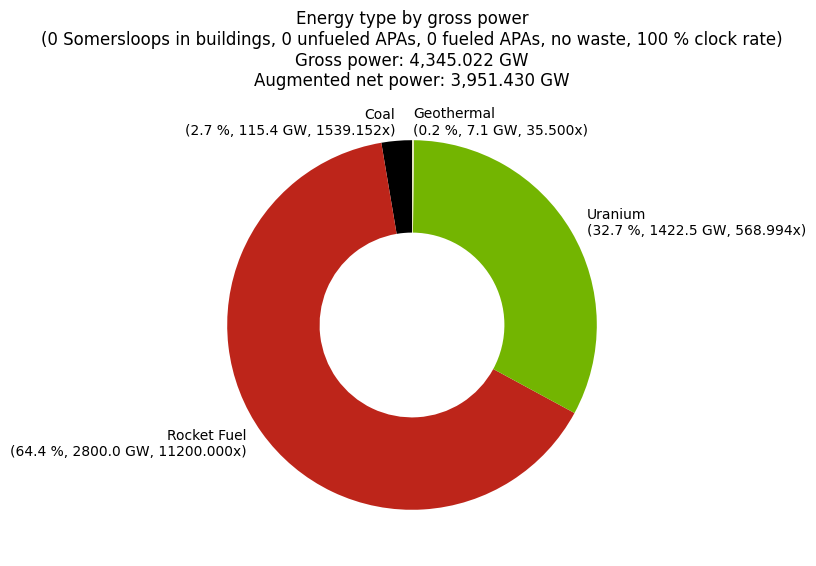

=== Recipes ===
Recipe_IngotIron_C: 356.3639710716634
Recipe_RocketFuel_C: 466.6666666666667
Recipe_IngotSAM_C: 85.0
Recipe_Bauxite_Copper_C: 9.015450361604232
Recipe_Nitrogen_Bauxite_C: 18.67061143984221
Recipe_Nitrogen_Caterium_C: 93.784352399737
Recipe_Sulfur_Iron_C: 111.51610782380017
Recipe_Uranium_Bauxite_C: 22.01347797501644
Recipe_Alternate_Turbofuel_C: 1493.3333333333333
Recipe_Alternate_EnrichedCoal_C: 709.3333333333335
Recipe_ResidualPlastic_C: 15.364365548980933
Recipe_ResidualRubber_C: 42.674556213017766
Recipe_QuartzCrystal_C: 91.03905325443789
Recipe_Alternate_PureCateriumIngot_C: 156.07823800131496
Recipe_AluminumScrap_C: 4.7416173570019735
Recipe_IngotAluminum_C: 18.966469428007894
Recipe_Silica_C: 303.12817357001984
Recipe_CrystalOscillator_C: 113.79881656804737
Recipe_Stator_C: 110.00552268244579
Recipe_Alternate_HeavyOilResidue_C: 420.0
Recipe_Alternate_CopperRotor_C: 33.71816787201403
Recipe_CopperSheet_C: 136.36891518737676
Recipe_Alternate_CoatedIronPlate_C: 40.9

In [13]:
solve_with_discretized_production_shards_and_visualize(
    default_production_boost=1.00,
    zero_almost_all_items=True,
    production_shards=0,
    alien_power_augmenters_unfueled=0,
    alien_power_augmenters_fueled=0,
)

In this case we don't use Somersloops, we don't allow waste, and almost all buildings are at 1 % clock rate.

The power is marginally higher (4.21 TW instead of the 3.94 TW) than the 100 % clock rate one.
Notice below, that a little bit of Ionized Fuel is generated, because now this is worth it.
Around around 28.7/min Plutonium Fuel Rod is generated, and then sinked in order to maximize power.

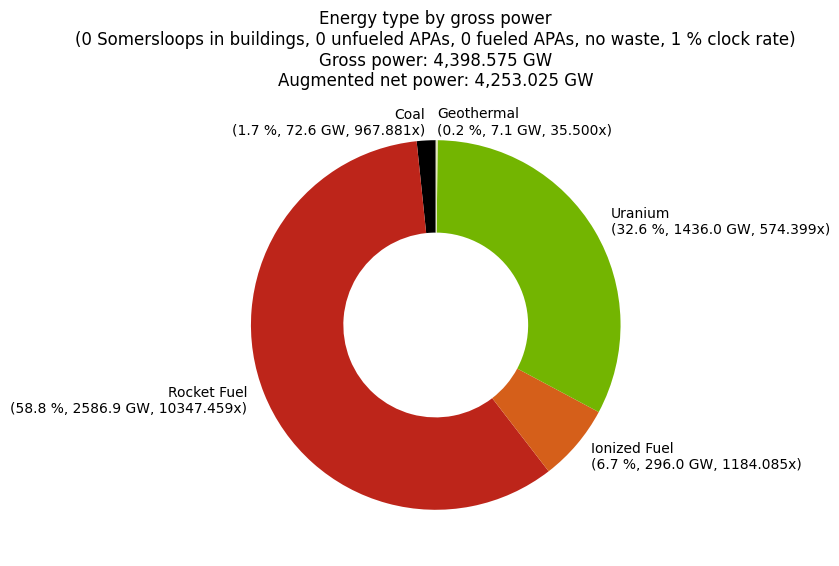

=== Recipes ===
Recipe_IronPlate_C: 1325.5536681129615
Recipe_RocketFuel_C: 46666.66666666667
Recipe_QuantumEnergy_C: 1332.095769056038
Recipe_IonizedFuel_C: 8880.638460373586
Recipe_TimeCrystal_C: 9374.007263727672
Recipe_IngotSAM_C: 8500.0
Recipe_Bauxite_Copper_C: 1128.9409279852878
Recipe_Nitrogen_Bauxite_C: 1950.7628505211283
Recipe_Nitrogen_Caterium_C: 9348.783065909058
Recipe_Sulfur_Iron_C: 10832.6309605327
Recipe_Uranium_Bauxite_C: 2238.8821950518272
Recipe_Alternate_Turbofuel_C: 149333.33333333334
Recipe_Alternate_EnrichedCoal_C: 69157.20564125864
Recipe_ResidualPlastic_C: 11128.004819562684
Recipe_ResidualRubber_C: 4307.992770655974
Recipe_Alternate_Diamond_Pink_C: 7499.205810982138
Recipe_Alternate_DarkMatter_Trap_C: 394.6950426832704
Recipe_Alternate_DarkMatter_Crystallization_C: 1036.0744870435853
Recipe_Alternate_WetConcrete_C: 5456.7908428309
Recipe_Alternate_PureQuartzCrystal_C: 15441.277491369343
Recipe_Alternate_PureCateriumIngot_C: 15756.084670454715
Recipe_AluminumSc

In [14]:
solve_with_discretized_production_shards_and_visualize(
    default_production_boost=0.01,
    zero_almost_all_items=True,
    production_shards=0,
    alien_power_augmenters_unfueled=0,
    alien_power_augmenters_fueled=0,
)

In this case we don't use Somersloops, we allow waste, and almost all buildings are at 100 % clock rate.

The power is again marginally higher (4.95 TW instead of the 3.94 TW) compared to the case where we didn't allow waste.
Now Plutonium Waste is generated at a rate of 633/min.

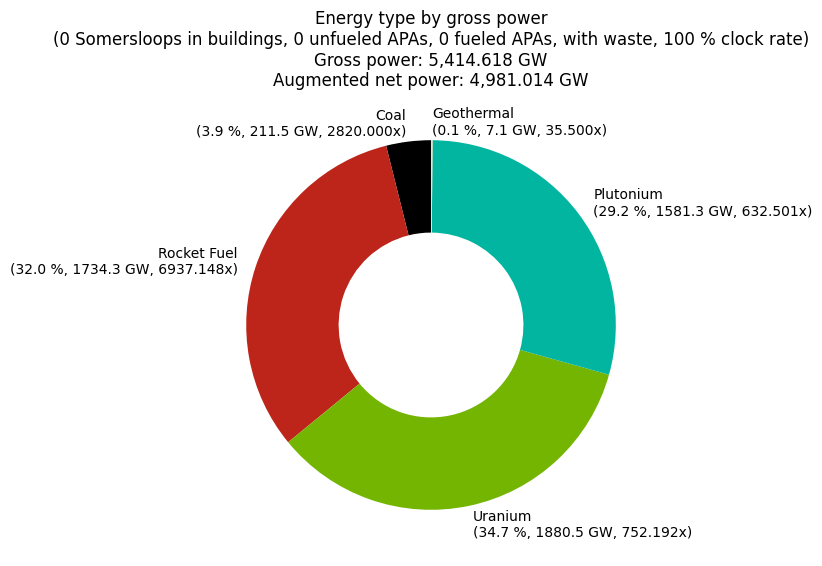

=== Recipes ===
Recipe_IngotIron_C: 794.2565074076425
Recipe_RocketFuel_C: 289.04785334510785
Recipe_IngotSAM_C: 85.0
Recipe_Bauxite_Copper_C: 88.2649614211435
Recipe_Nitrogen_Caterium_C: 88.43513275224717
Recipe_Sulfur_Iron_C: 39.76675258994574
Recipe_Uranium_Bauxite_C: 38.53315323666361
Recipe_Alternate_Turbofuel_C: 192.69856889673855
Recipe_PetroleumCoke_C: 71.86032703101488
Recipe_ResidualPlastic_C: 110.59061947640711
Recipe_Alternate_PureQuartzCrystal_C: 94.95034530277049
Recipe_Alternate_PureCateriumIngot_C: 182.8243362387642
Recipe_IngotAluminum_C: 97.68626259863748
Recipe_Silica_C: 115.68001040564826
Recipe_CrystalOscillator_C: 276.9385071330806
Recipe_Stator_C: 150.43831096218315
Recipe_Alternate_HeavyOilResidue_C: 420.0
Recipe_Alternate_ElectroAluminumScrap_C: 29.305878779591243
Recipe_Alternate_CopperRotor_C: 44.57431435916537
Recipe_CopperSheet_C: 142.03727204451826
Recipe_Alternate_CopperAlloyIngot_C: 247.28082648983502
Recipe_Alternate_CoatedIronPlate_C: 60.89316821813415

In [15]:
solve_with_discretized_production_shards_and_visualize(
    default_production_boost=1.00,
    zero_almost_all_items=False,
    production_shards=0,
    alien_power_augmenters_unfueled=0,
    alien_power_augmenters_fueled=0,
)

In this case we don't use Somersloops, we allow waste, and almost all buildings are at 1 % clock rate.

The power is again marginally higher (5.2 TW instead of the 4.95 TW) compared to the case where all buildings were at 100 % clock rate.
Now we use a little bit of Ionized Fuel, and again around the same amount of Plutonium Waste is generated.

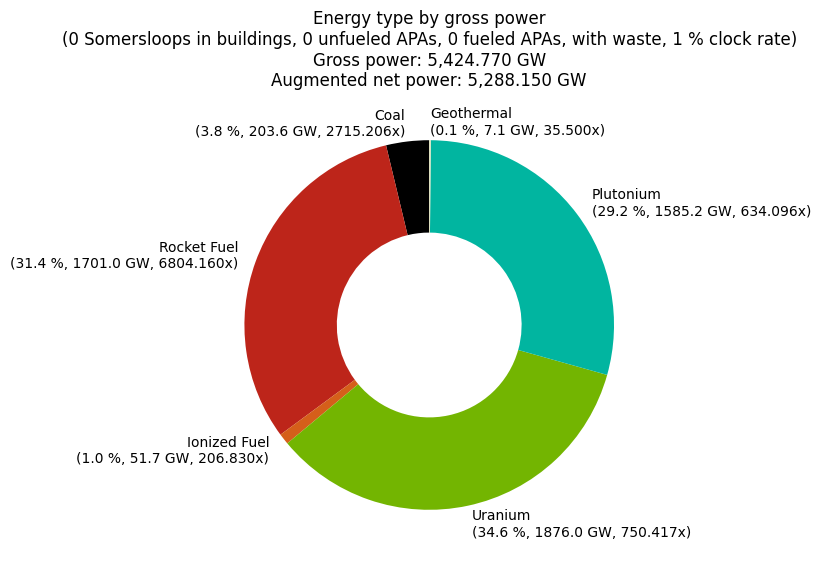

=== Recipes ===
Recipe_IronPlate_C: 21476.55725271884
Recipe_RocketFuel_C: 28971.158218246932
Recipe_QuantumEnergy_C: 232.68409293134138
Recipe_IonizedFuel_C: 1551.2272862089426
Recipe_TimeCrystal_C: 1637.4065798872168
Recipe_IngotSAM_C: 8500.0
Recipe_Bauxite_Copper_C: 8851.457848699774
Recipe_Nitrogen_Caterium_C: 8852.14150964691
Recipe_Sulfur_Iron_C: 3939.1543821258533
Recipe_Uranium_Bauxite_C: 3857.2462595274687
Recipe_Alternate_Turbofuel_C: 19831.181240900918
Recipe_PetroleumCoke_C: 7162.4676443523085
Recipe_ResidualPlastic_C: 14000.0
Recipe_Alternate_Diamond_Pink_C: 1309.9252639097733
Recipe_Alternate_DarkMatter_Trap_C: 68.94343494261965
Recipe_Alternate_DarkMatter_Crystallization_C: 180.9765167243767
Recipe_Alternate_WetConcrete_C: 8243.248323050715
Recipe_Alternate_SteamedCopperSheet_C: 7909.60976503325
Recipe_Alternate_PureQuartzCrystal_C: 10379.051066485361
Recipe_Alternate_PureCateriumIngot_C: 18239.292451765454
Recipe_IngotAluminum_C: 9793.260828239736
Recipe_CrystalOscillat

In [16]:
solve_with_discretized_production_shards_and_visualize(
    default_production_boost=0.01,
    zero_almost_all_items=False,
    production_shards=0,
    alien_power_augmenters_unfueled=0,
    alien_power_augmenters_fueled=0,
)

## Results with Somersloops

When we are using Somersloops, first we have to decide how much Somersloops are needed in the buildings, and how much to construct the Alien Power Augmenters.
Moreover, we need to decide out of all these Alien Power Augmenters how much of it is fueled.
In order to do that, first, all possibilities are calculated, and then out of these possibilities, the one which generated the maximum average net augmented power is presented.

The trend is generatelly the same as before with regards to the waste and clock rate.

One interesting thing to mention is that it's still worth generating a lot of Alien Power Matrix, even if that is quite expensive.

The other thing which is interesting is that the most optimal way to utilize the Somersloops in the buildings is to generate a lot of Reanimated SAMs, and still overclock those constructors which construct the Reanimated SAM to 250 %, even if they consume a lot of power. I will not detail this here, but if we do not allow that much Alien Power Augmenters to be used, then Somersloops are usually used in other places, most notably at the end of the production chain, to generate Nuclear Fuels, and in Converters to generate mostly Uranium.

Calculating alien_power_augmenters=0, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=0, production_shards=105
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=0, production_shards=94
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=1, production_shards=94
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=0, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=1, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=2, production_shards=84
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=3, alien_power_augmenters_fueled=0, production_shards=74
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=1, prod

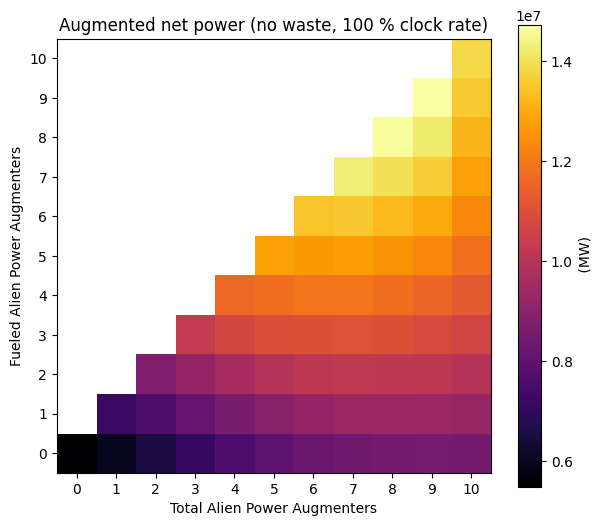

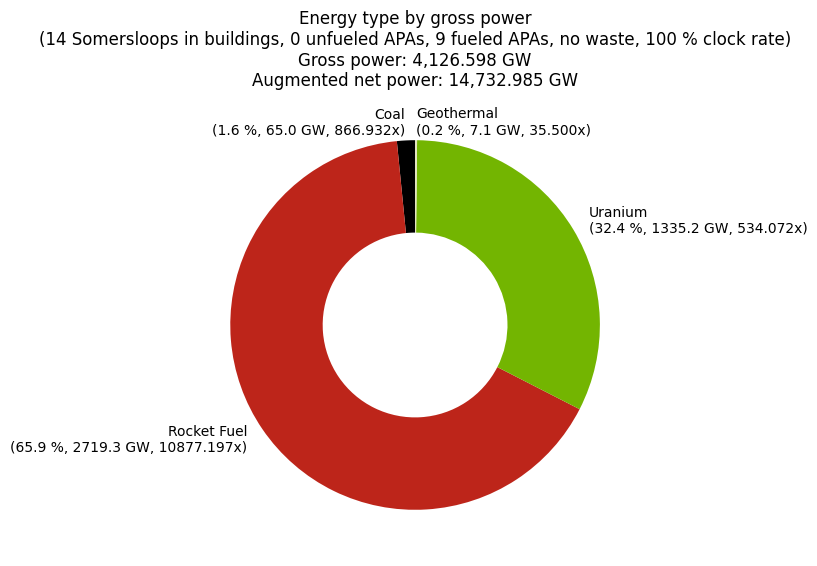

=== Recipes ===
Recipe_IronPlate_C: 179.5779447055552
Recipe_IngotIron_C: 659.252349710642
Recipe_RocketFuel_C: 453.2165258499641
Recipe_QuantumEnergy_C: 30.375
Recipe_SuperpositionOscillator_C: 27.0
Recipe_SAMFluctuator_C: 22.5
Recipe_TimeCrystal_C: 97.5
Recipe_IngotSAM_C: 50.0
Recipe_IngotSAM_C_PS1_PB2.5: 14.0
Recipe_Nitrogen_Bauxite_C: 9.949968157458366
Recipe_Nitrogen_Caterium_C: 94.52935908087491
Recipe_Sulfur_Iron_C: 100.93237279290847
Recipe_Uranium_Bauxite_C: 19.588299968758253
Recipe_Alternate_Turbofuel_C: 1385.7322067997127
Recipe_Alternate_EnrichedCoal_C: 650.152713739842
Recipe_PetroleumCoke_C: 5.043802806263466
Recipe_ResidualPlastic_C: 100.1825238518661
Recipe_ResidualRubber_C: 59.72621422220086
Recipe_Alternate_Diamond_Pink_C: 49.89808813145795
Recipe_Alternate_Diamond_Cloudy_C: 21.076433901406535
Recipe_Alternate_DarkMatter_Trap_C: 10.5
Recipe_Alternate_DarkMatter_Crystallization_C: 22.5
Recipe_Alternate_PureQuartzCrystal_C: 147.97051432141916
Recipe_Alternate_PureCater

In [17]:
optimize_somersloops_and_visualize(
    default_production_boost=1.00,
    zero_almost_all_items=True,
)

Calculating alien_power_augmenters=0, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=0, production_shards=105
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=0, production_shards=94
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=1, production_shards=94
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=0, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=1, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=2, production_shards=84
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=3, alien_power_augmenters_fueled=0, production_shards=74
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=1, prod

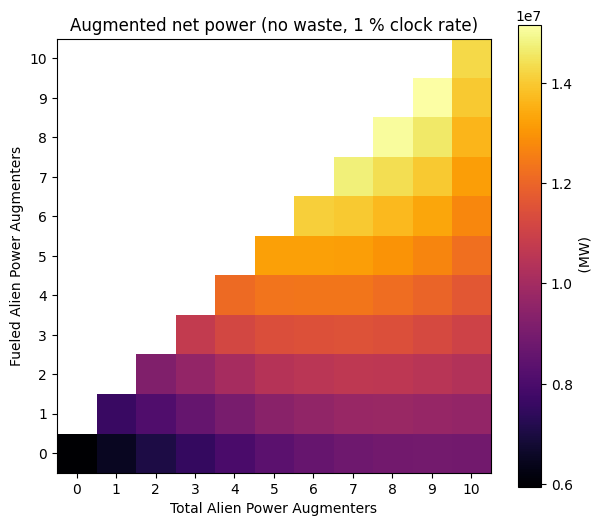

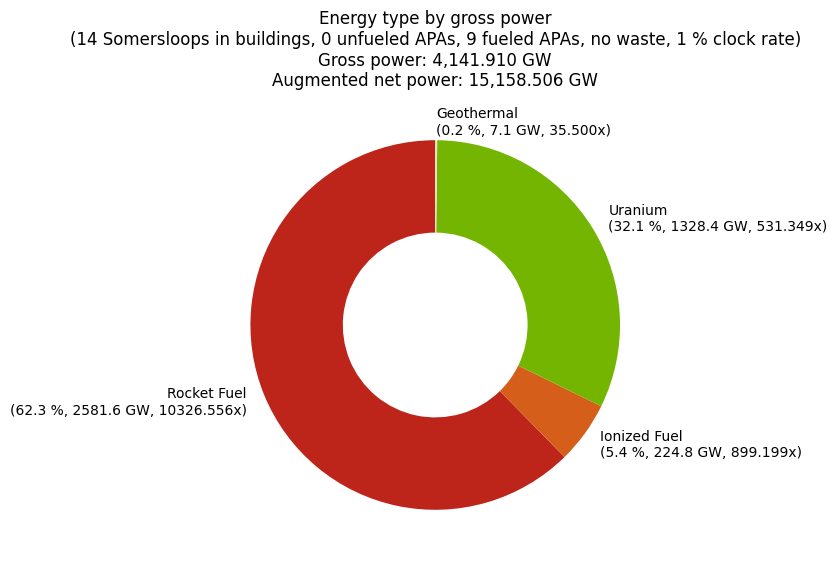

=== Recipes ===
Recipe_IronPlate_C: 17927.807239606846
Recipe_RocketFuel_C: 45724.9115746501
Recipe_QuantumEnergy_C: 4049.098456071838
Recipe_SuperpositionOscillator_C: 2700.0
Recipe_IonizedFuel_C: 6743.989707145584
Recipe_SAMFluctuator_C: 2250.0
Recipe_TimeCrystal_C: 16868.655801987003
Recipe_IngotSAM_C: 5000.0
Recipe_IngotSAM_C_PS1_PB2.5: 14.0
Recipe_Nitrogen_Bauxite_C: 1090.2953172911332
Recipe_Nitrogen_Caterium_C: 9464.828926461421
Recipe_Sulfur_Iron_C: 10004.954192217907
Recipe_Uranium_Bauxite_C: 1939.921564029537
Recipe_Alternate_Turbofuel_C: 141799.29259720075
Recipe_Alternate_EnrichedCoal_C: 65440.812987031306
Recipe_PetroleumCoke_C: 353.1581595062152
Recipe_ResidualPlastic_C: 9997.766448800005
Recipe_ResidualRubber_C: 6003.350326799994
Recipe_Alternate_Diamond_Pink_C: 566.7903919862811
Recipe_Alternate_Diamond_Cloudy_C: 9696.100687202492
Recipe_Alternate_DarkMatter_Trap_C: 1349.7328758731371
Recipe_Alternate_DarkMatter_Crystallization_C: 3036.7987991669847
Recipe_Alternate_Wet

In [18]:
optimize_somersloops_and_visualize(
    default_production_boost=0.01,
    zero_almost_all_items=True,
)

Calculating alien_power_augmenters=0, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=0, production_shards=105
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=0, production_shards=94
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=1, production_shards=94
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=0, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=1, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=2, production_shards=84
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=3, alien_power_augmenters_fueled=0, production_shards=74
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=1, prod

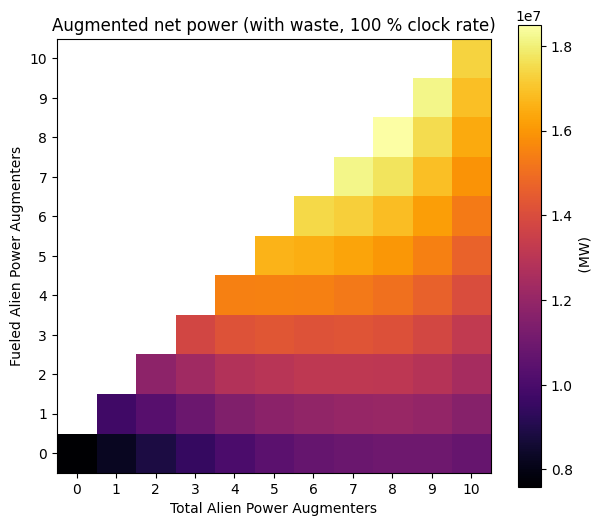

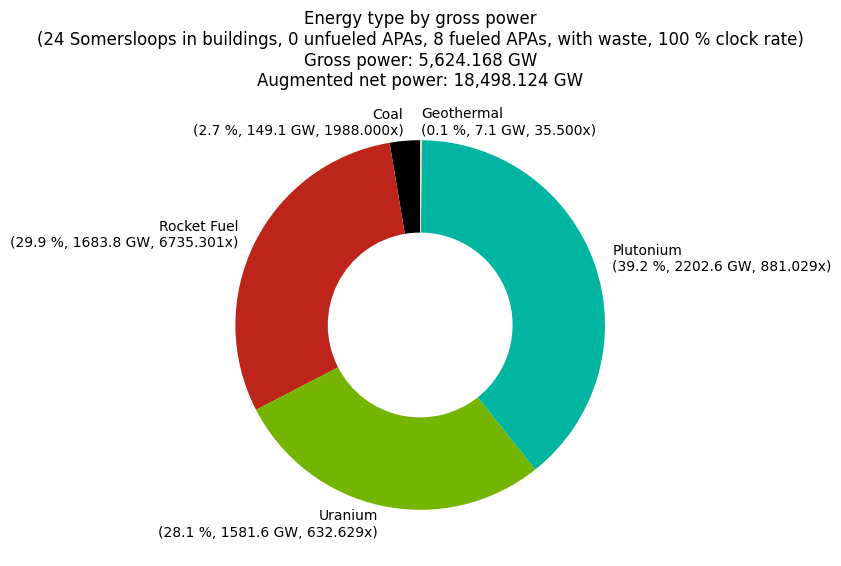

=== Recipes ===
Recipe_IronPlate_C: 123.53686275871137
Recipe_IngotIron_C: 1242.2726240426366
Recipe_RocketFuel_C: 280.6375605268528
Recipe_QuantumEnergy_C: 27.0
Recipe_SuperpositionOscillator_C: 24.0
Recipe_SAMFluctuator_C: 20.0
Recipe_TimeCrystal_C: 86.66666666666667
Recipe_IngotSAM_C: 25.0
Recipe_IngotSAM_C_PS1_PB2.5: 24.0
Recipe_Bauxite_Copper_C: 151.35243988289497
Recipe_Nitrogen_Caterium_C: 80.30280409380258
Recipe_Sulfur_Iron_C: 34.32570634552631
Recipe_Uranium_Bauxite_C: 49.019049677776145
Recipe_Alternate_Turbofuel_C: 187.09170701790188
Recipe_PetroleumCoke_C: 78.65334698965577
Recipe_ResidualPlastic_C: 30.756164246864603
Recipe_ResidualRubber_C: 163.86575362970308
Recipe_Alternate_Diamond_Cloudy_C: 52.0
Recipe_Alternate_DarkMatter_Trap_C: 9.333333333333334
Recipe_Alternate_DarkMatter_Crystallization_C: 20.0
Recipe_Alternate_WetConcrete_C: 84.10174321269565
Recipe_Alternate_SteamedCopperSheet_C: 194.06206986960703
Recipe_Alternate_PureQuartzCrystal_C: 93.83007911468589
Recipe_

In [19]:
optimize_somersloops_and_visualize(
    default_production_boost=1.00,
    zero_almost_all_items=False,
)

Calculating alien_power_augmenters=0, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=0, production_shards=105
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=0, production_shards=94
Calculating alien_power_augmenters=1, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=1, production_shards=94
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=0, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=1, alien_power_augmenters_fueled=1, production_shards=84
Calculating alien_power_augmenters=2, alien_power_augmenters_unfueled=0, alien_power_augmenters_fueled=2, production_shards=84
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=3, alien_power_augmenters_fueled=0, production_shards=74
Calculating alien_power_augmenters=3, alien_power_augmenters_unfueled=2, alien_power_augmenters_fueled=1, prod

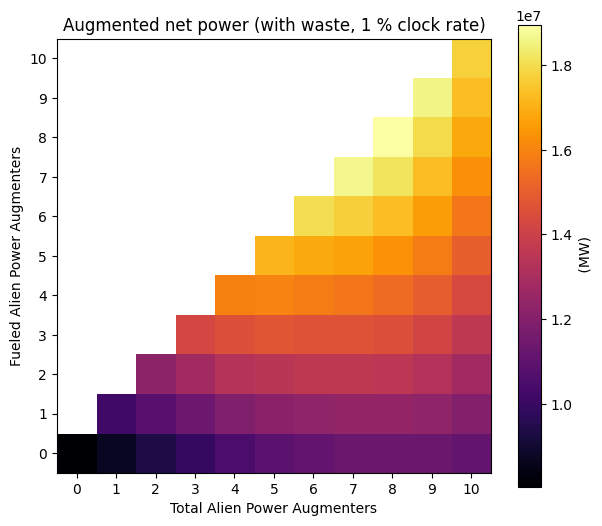

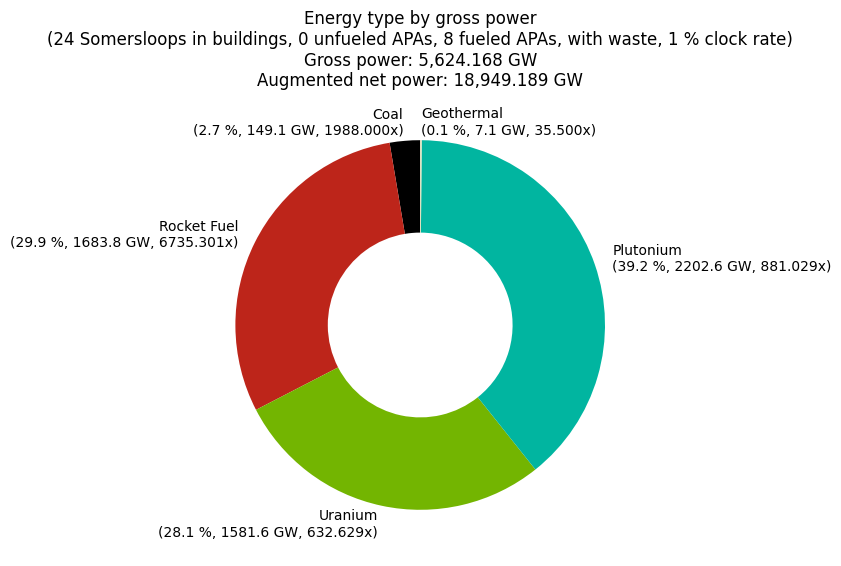

=== Recipes ===
Recipe_IronPlate_C: 12353.686275871163
Recipe_IngotIron_C: 114386.37401511928
Recipe_RocketFuel_C: 28063.756052685283
Recipe_QuantumEnergy_C: 2700.0000000000005
Recipe_SuperpositionOscillator_C: 2400.0
Recipe_SAMFluctuator_C: 1999.9999999999998
Recipe_TimeCrystal_C: 8666.666666666668
Recipe_IngotSAM_C: 2500.0
Recipe_IngotSAM_C_PS1_PB2.5: 24.0
Recipe_Bauxite_Copper_C: 15135.243988289494
Recipe_Nitrogen_Caterium_C: 8030.2804093802615
Recipe_Sulfur_Iron_C: 3432.5706345526264
Recipe_Uranium_Bauxite_C: 4901.904967777615
Recipe_Alternate_Turbofuel_C: 18709.170701790186
Recipe_PetroleumCoke_C: 7865.334698965577
Recipe_ResidualPlastic_C: 3075.616424686474
Recipe_ResidualRubber_C: 16386.57536297029
Recipe_Alternate_Diamond_Cloudy_C: 5200.0
Recipe_Alternate_DarkMatter_Trap_C: 933.3333333333334
Recipe_Alternate_DarkMatter_Crystallization_C: 2000.0000000000002
Recipe_Alternate_WetConcrete_C: 11453.372119135685
Recipe_Alternate_SteamedCopperSheet_C: 23155.1168494919
Recipe_Alternate

In [20]:
optimize_somersloops_and_visualize(
    default_production_boost=0.01,
    zero_almost_all_items=False,
)